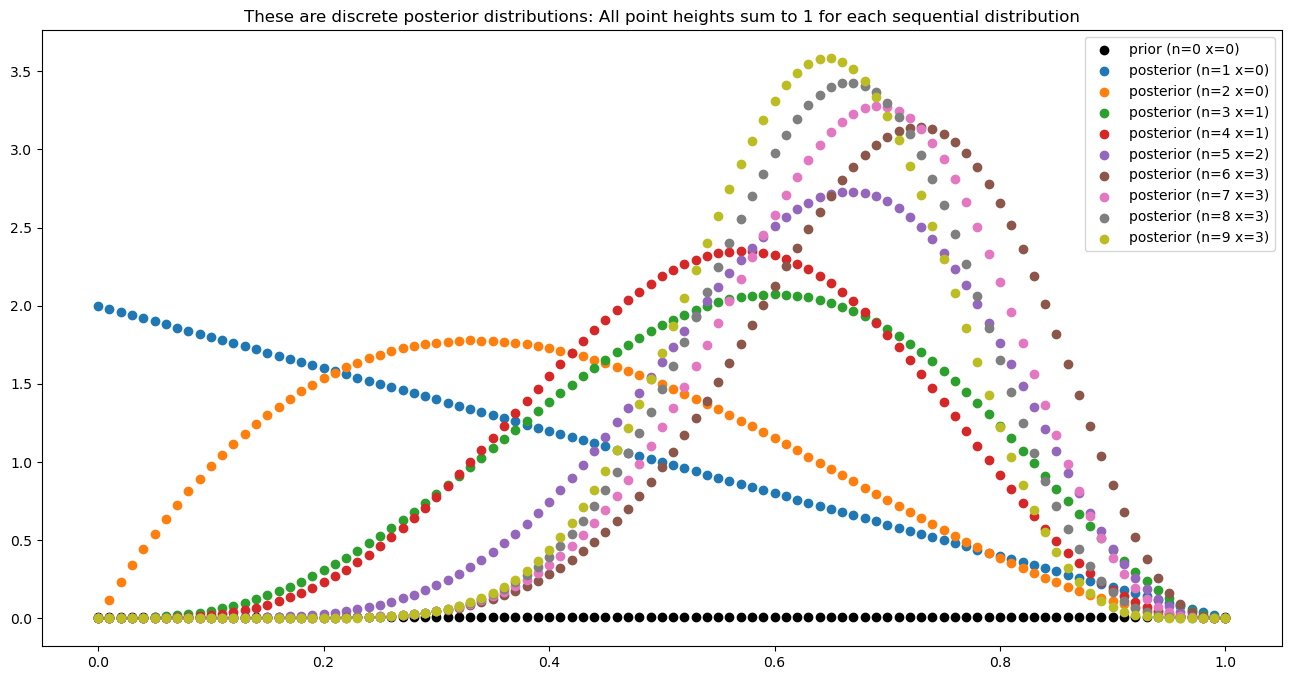

In [2]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 # proportional to beta(1,1)

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")
for observation in observations:
    n += 1
    x += observation
    
    posterior = stats.beta(x + n, 1 + n - x) # n=1 for bernoulli distr
    plt.scatter(parameter_domain, posterior.pdf(parameter_domain), label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();

<Figure size 1600x800 with 0 Axes>

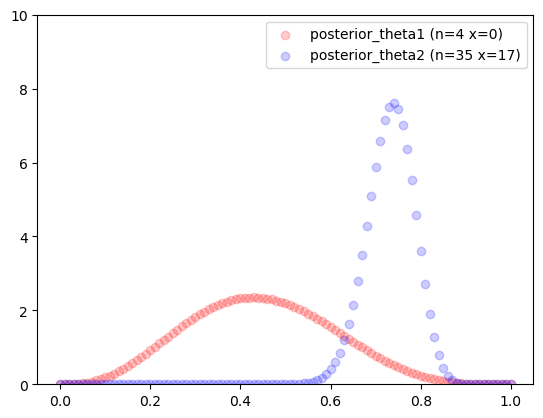

In [9]:
# Q2
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
parameter_domain = np.linspace(0,1,101) 
theta1 = 0.1
theta2 = 0.5
m = 40
n_1 = 0; x_1 = 0
n_2 = 0; x_2 = 0
# prior assumption is thetas are sampled from uniform distr
# initial posteriors (which is actually the prior)
posterior_1 = stats.beta(1, 1)
posterior_2 = stats.beta(1, 1)
plt.figure(figsize=(16,8))
fig,ax = plt.subplots()

# ax.title("These are discrete posterior distributions: All point heights sum to 1" + 
          # " for each sequential distribution")
np.random.seed(365)
def animate(t):
    global posterior_1, posterior_2, x_1, x_2, n_1, n_2
    ax.clear()
    ax.set_ylim(0,10)
    if (t == 0):
        lin1 = ax.scatter(parameter_domain, posterior_1.pdf(parameter_domain), 
            label="prior_theta1 (n="+str(n_1)+" x="+str(x_1)+")", color='red', alpha=0.2)
        lin2 = ax.scatter(parameter_domain, posterior_2.pdf(parameter_domain), 
            label="prior_theta2 (n="+str(n_2)+" x="+str(x_2)+")", color='blue', alpha=0.2)
    else:
        samp_1 = float(posterior_1.rvs(1))
        samp_2 = float(posterior_2.rvs(1))
        if (samp_2 > samp_1):
            result = stats.bernoulli(theta2).rvs(1)
            x_2 += int(result)
            n_2 += 1
            posterior_2 = stats.beta(x_2 + n_2, 1 + n_2 - x_2)
        else:
            result = stats.bernoulli(theta1).rvs(1)
            x_1 += int(result)
            n_1 += 1
            posterior_1 = stats.beta(x_1 + n_1, 1 + n_1 - x_1)
        lin1 = ax.scatter(parameter_domain, posterior_1.pdf(parameter_domain), 
                    label="posterior_theta1 (n="+str(n_1)+" x="+str(x_1)+")", color='red', alpha=0.2)
        lin2 = ax.scatter(parameter_domain, posterior_2.pdf(parameter_domain), 
                    label="posterior_theta2 (n="+str(n_2)+" x="+str(x_2)+")", color='blue', alpha=0.2)

    leg = ax.legend() 
    return lin1, lin2, leg
    
ani = FuncAnimation(fig, animate, interval=500, blit=True, repeat=True, frames=m, repeat_delay = 500)    
ani.save("HW2_Q2.gif", dpi=100, writer=PillowWriter(fps=2))
# look at HW2_Q2.gif in my repo to see the learning process from the start(t = 0) to end (t = 39)

In [1]:
# Q3
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

thetas = np.array([0.2, 0.7, 0.1])
m = 50
# coin flips
np.random.seed(365)
obs_1 = stats.bernoulli(thetas[0]).rvs(m)
obs_2 = stats.bernoulli(thetas[1]).rvs(m)
obs_3 = stats.bernoulli(thetas[2]).rvs(m)
# analysis 1: 
# prior assumption is thetas are sampled from uniform distr
# initial posteriors (which is actually the prior)
posterior_1 = stats.beta(1, 1)
posterior_2 = stats.beta(2, 1)
posterior_3 = stats.beta(1, 1)

# analysis 2:
posterior_dir = stats.dirichlet([1, 2, 1])




AB Testing Application: Website design \
Scenerio: There is a discount on yarn, but the company doesn't know which products to promote on their online shopping landing page in order to maximize number of sales. \
Marketing decides on 3 designs, each featuring a different type of yarn:
1. Acrylic
2. Bamboo
3. Cashmere

Which design should the company feature on their landing page? \
Based on historical data, plant-based yarns have the most sales. But maybe the discount will attract thrifty people who prefer cheaper synthetic yarns or maybe the discount will motivate customers to buy a more luxury product that would usually be too expensive. The company decides to show 2. Bamboo to 50% of website traffic, and allocate 25% each to 1. Acrylic and 3. Cashmere (this is their prior). Then, they may use the Bayesian multi-armed bandit to dynamically change the allocation of website traffic among the 3 designs based on if the customer actually bought anything from the website during their session. For simplicity, each customer's behaviour is similar to an observation of a Bernoulli likelihood (purchase = 1, no purchase = 0). \


